## Analisis descriptivo

### Librerias

In [112]:
import numpy as np
import pandas as pd
#import warnings
#warnings.filterwarnings('ignore')
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de conjunto de datos preprocesado

In [113]:
df_eda=pd.read_csv('datos_concatenados.csv')
df_agregacion=pd.read_csv('datos_concatenados2.csv')


In [114]:
# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['Abandono_o_Despojo_Forzado_de_Tierras', 'categoria', 'Otro_Hecho_Simultaneo']

# Eliminar columnas del DataFrame
df_eda = df_eda.drop(columns=columnas_a_eliminar)
df_eda["Total_de_victimas"]=df_agregacion["Total_de_Victimas_del_Caso"]


In [115]:
df_eda

,Ano,Municipio,Presunto_Responsable,Latitud,Longitud,caso,Total_de_victimas
0,2003,FUSAGASUGA,GRUPO ARMADO NO IDENTIFICADO,4.323534,-74.388591,Asesinatos selectivos,1
1,2003,FUSAGASUGA,GRUPO PARAMILITAR,4.323534,-74.388591,Asesinatos selectivos,3
2,2004,FUSAGASUGA,GUERRILLA,4.323534,-74.388591,Asesinatos selectivos,1
3,2004,FUSAGASUGA,GRUPO PARAMILITAR,4.323534,-74.388591,Asesinatos selectivos,1
4,2004,FUSAGASUGA,GRUPO PARAMILITAR,4.323534,-74.388591,Asesinatos selectivos,1
...,...,...,...,...,...,...,...
264531,2021,SEVILLA,GUERRILLA,4.193412,-75.888182,Violencia sexual,1
264532,2020,CUMBAL,GRUPO ARMADO NO IDENTIFICADO,0.906301,-77.792279,Violencia sexual,1
264533,2004,QUIBDO,GUERRILLA,5.754323,-76.650151,Violencia sexual,1
264534,2003,SARAVENA,AGENTE DEL ESTADO,6.906942,-71.850708,Violencia sexual,1


In [116]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264536 entries, 0 to 264535
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Ano                   264536 non-null  int64  
 1   Municipio             264536 non-null  object 
 2   Presunto_Responsable  264536 non-null  object 
 3   Latitud               264536 non-null  float64
 4   Longitud              264536 non-null  float64
 5   caso                  264536 non-null  object 
 6   Total_de_victimas     264536 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 14.1+ MB


### Resumen de los datos


In [117]:
resumen = {
    "dimensiones": df_eda.shape,
    "tipos_de_datos": df_eda.dtypes,
    "valores_nulos": df_eda.isnull().sum(),
    "valores_unicos": df_eda.nunique()
}

resumen



{'dimensiones': (264536, 7),
 'tipos_de_datos': Ano                       int64
 Municipio                object
 Presunto_Responsable     object
 Latitud                 float64
 Longitud                float64
 caso                     object
 Total_de_victimas         int64
 dtype: object,
 'valores_nulos': Ano                     0
 Municipio               0
 Presunto_Responsable    0
 Latitud                 0
 Longitud                0
 caso                    0
 Total_de_victimas       0
 dtype: int64,
 'valores_unicos': Ano                       82
 Municipio               1019
 Presunto_Responsable      13
 Latitud                 5585
 Longitud                5587
 caso                       5
 Total_de_victimas         49
 dtype: int64}

In [118]:
print("Información básica del dataset:")
print(f"Número total de registros: {len(df_eda)}")
print(f"Número de columnas: {len(df_eda.columns)}")
print("\nPrimeras 5 filas:")
print(df_eda.head())
print("\nResumen estadístico:")
print(df_eda.describe(include='all'))

Información básica del dataset:
Número total de registros: 264536
Número de columnas: 7

Primeras 5 filas:
    Ano   Municipio          Presunto_Responsable   Latitud   Longitud  \
0  2003  FUSAGASUGA  GRUPO ARMADO NO IDENTIFICADO  4.323534 -74.388591   
1  2003  FUSAGASUGA             GRUPO PARAMILITAR  4.323534 -74.388591   
2  2004  FUSAGASUGA                     GUERRILLA  4.323534 -74.388591   
3  2004  FUSAGASUGA             GRUPO PARAMILITAR  4.323534 -74.388591   
4  2004  FUSAGASUGA             GRUPO PARAMILITAR  4.323534 -74.388591   

                    caso  Total_de_victimas  
0  Asesinatos selectivos                  1  
1  Asesinatos selectivos                  3  
2  Asesinatos selectivos                  1  
3  Asesinatos selectivos                  1  
4  Asesinatos selectivos                  1  

Resumen estadístico:
                  Ano Municipio Presunto_Responsable        Latitud  \
count   264536.000000    264536               264536  264536.000000   
unique  

### Casos por año

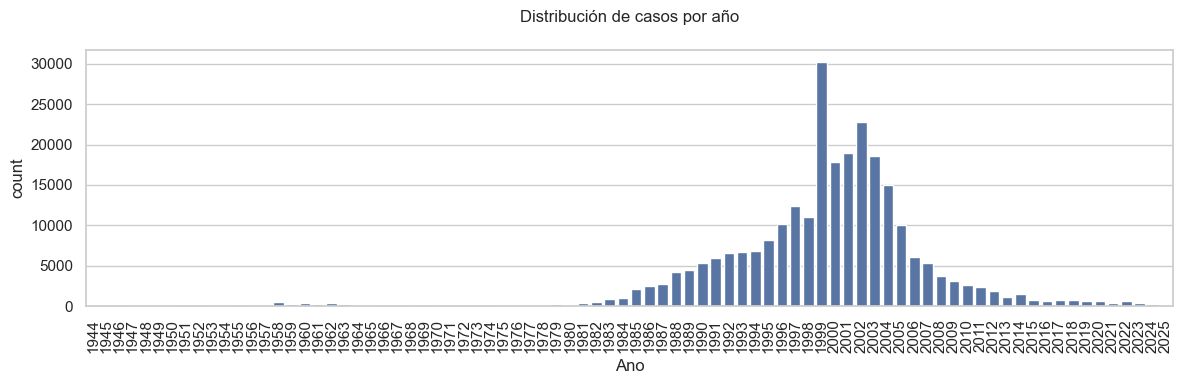

In [119]:
# 1. Distribución de casos por año
plt.figure(figsize=(12, 4))
sns.countplot(data=df_eda, x="Ano", order=sorted(df_eda["Ano"].unique()))
plt.title("Distribución de casos por año")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Presuntos responsables


Distribución por presunto responsable:
Presunto_Responsable
GRUPO PARAMILITAR                               95207
DESCONOCIDO                                     72492
GUERRILLA                                       43488
GRUPO ARMADO NO IDENTIFICADO                    33103
GRUPO POSDESMOVILIZACIÓN                         8019
AGENTE DEL ESTADO                                7309
BANDOLERISMO                                     2182
OTRO ¿CUÁL?                                      1623
AGENTE DEL ESTADO - GRUPO PARAMILITAR             891
CRIMEN ORGANIZADO                                 164
AGENTE DEL ESTADO - GRUPO POSDESMOVILIZACIÓN       34
AGENTE EXTRANJERO                                  22
GRUPO POSDESMOVILIZACIÓN - GUERRILLA                2
Name: count, dtype: int64


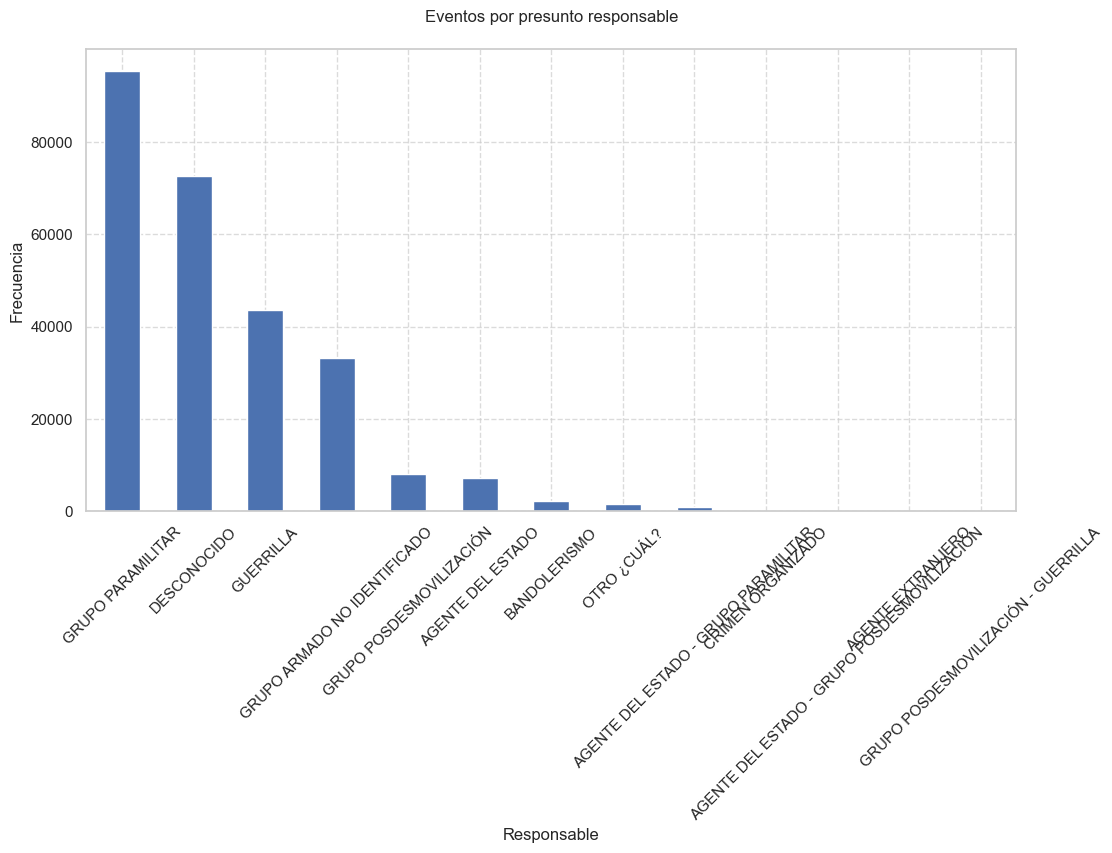

In [120]:
print("\nDistribución por presunto responsable:")
responsable_counts = df_eda['Presunto_Responsable'].value_counts()
print(responsable_counts)

plt.figure(figsize=(12,6))
responsable_counts.plot(kind='bar')
plt.title('Eventos por presunto responsable')
plt.xlabel('Responsable')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [121]:
#Análisis de combinaciones frecuentes
print("\nCombinaciones frecuentes de responsable y municipio:")
combinaciones = df_eda.groupby(['Presunto_Responsable', 'Municipio']).size().sort_values(ascending=False).head(10)
print(combinaciones)


Combinaciones frecuentes de responsable y municipio:
Presunto_Responsable          Municipio      
DESCONOCIDO                   MEDELLIN           8632
GRUPO PARAMILITAR             MEDELLIN           6873
DESCONOCIDO                   SIN INFORMACION    3852
GRUPO ARMADO NO IDENTIFICADO  MEDELLIN           2290
GRUPO PARAMILITAR             SANTA MARTA        2166
                              CUCUTA             2148
                              TURBO              1723
                              APARTADO           1540
                              CIENAGA            1487
                              BARRANCABERMEJA    1474
dtype: int64


<Figure size 1400x800 with 0 Axes>

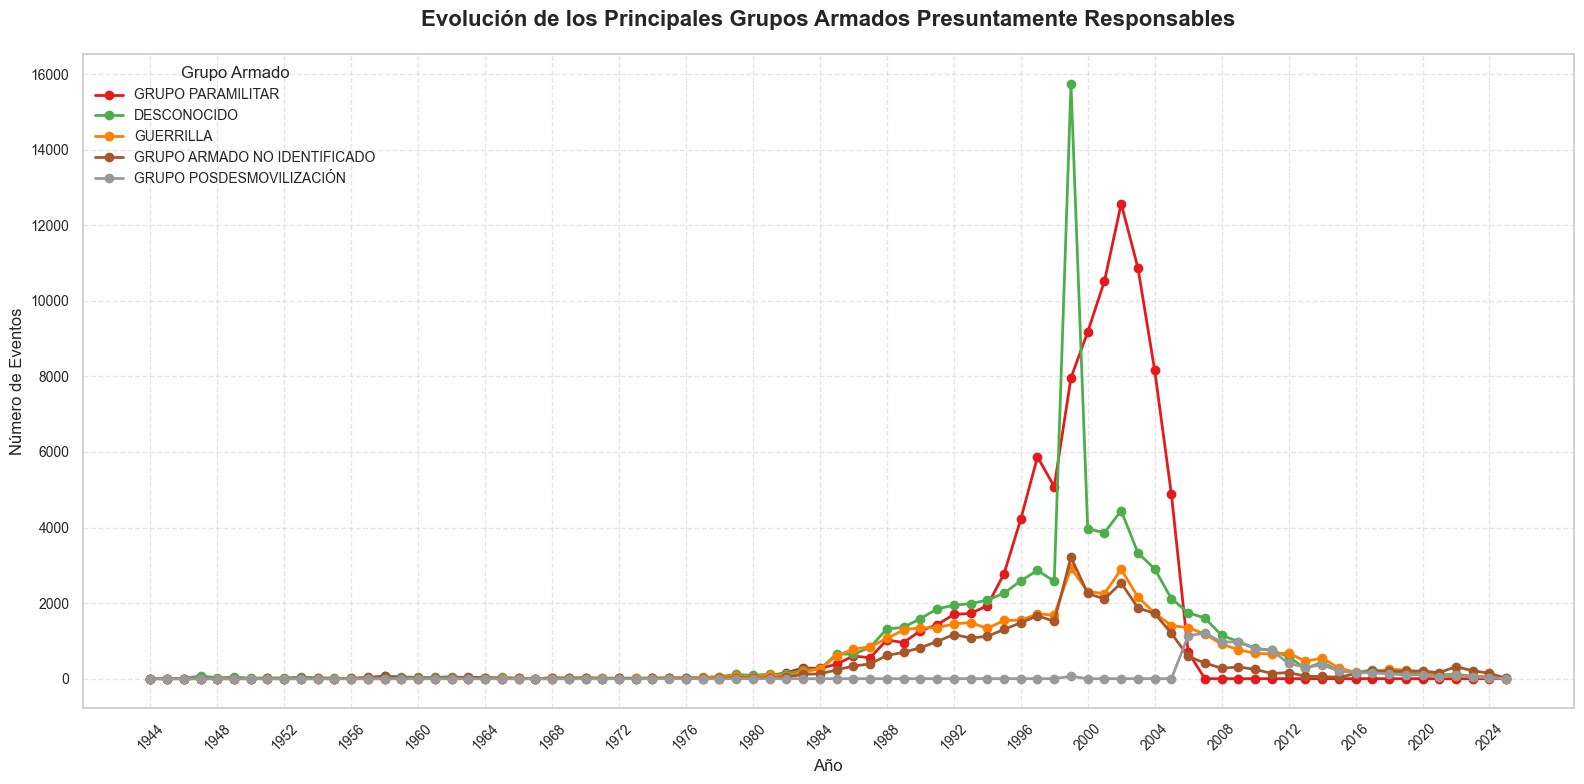

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Agrupación por año y grupo armado
grupos_por_ano = df_eda.groupby(['Ano', 'Presunto_Responsable']).size().unstack().fillna(0)

# Seleccionar los 5 grupos con más eventos
top_grupos = grupos_por_ano.sum().sort_values(ascending=False).index[:5]
grupos_principales = grupos_por_ano[top_grupos]

# Estilo
sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))

# Graficar
grupos_principales.plot(kind='line', marker='o', linewidth=2, figsize=(16, 8), colormap='Set1')

# Ajustes de eje X con intervalos de 4 años
xticks = np.arange(df_eda['Ano'].min(), df_eda['Ano'].max() + 1, 4)
plt.xticks(xticks, rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Títulos y etiquetas
plt.title('Evolución de los Principales Grupos Armados Presuntamente Responsables', fontsize=16, weight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)

# Leyenda y estilo
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Grupo Armado', title_fontsize=12, fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


Gráfico de líneas que muestra el número de eventos violentos anuales atribuidos a los cinco grupos armados con mayor actividad en Colombia: grupo paramilitar, guerrilla, grupo armado no identificado, grupo posdesmovilización y actores desconocidos. Se observa un aumento significativo en los eventos a finales de los años noventa e inicios de los 2000, seguido de una disminución en años recientes.

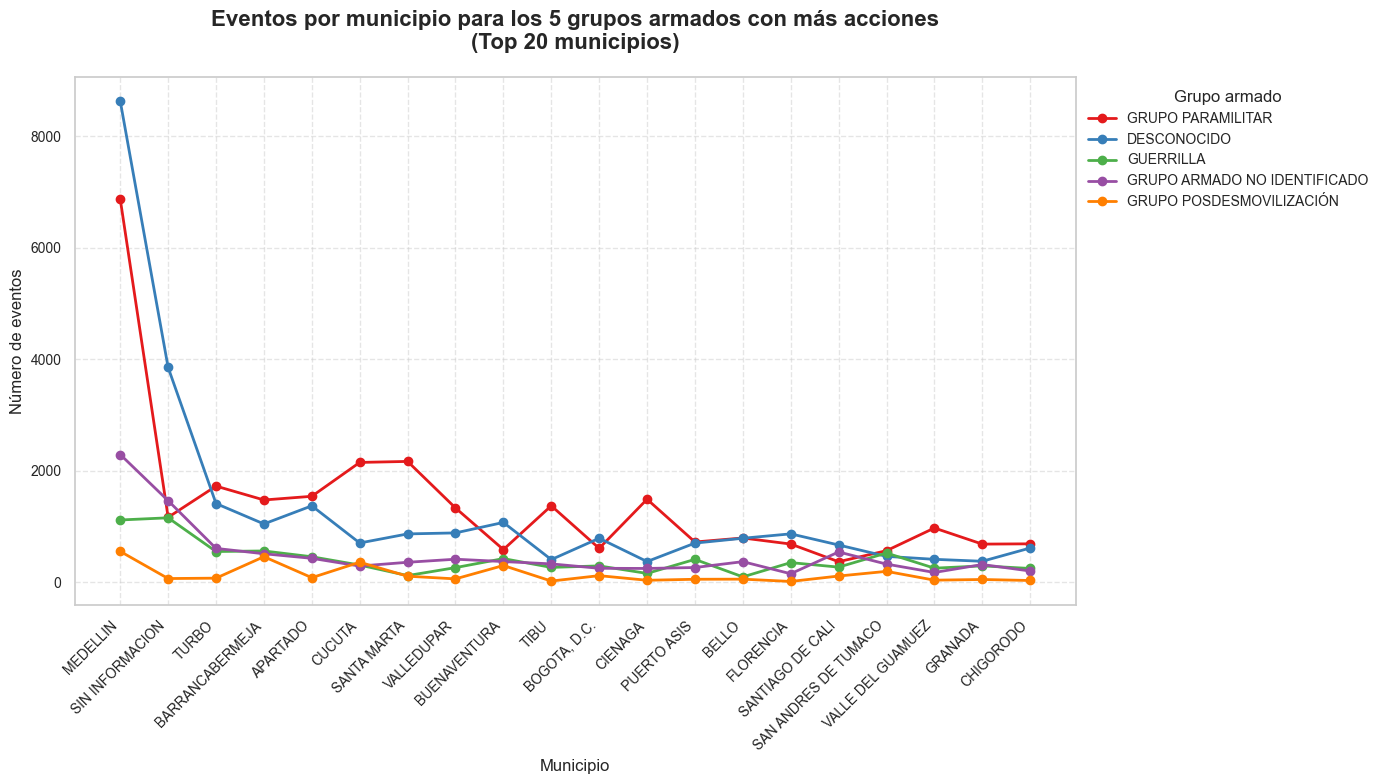

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar estilo Seaborn
sns.set(style='whitegrid')

# Figura
plt.figure(figsize=(14, 8))

# Paleta de colores diferenciables
colors = sns.color_palette("Set1", n_colors=len(top_grupos))

# Dibujar cada grupo con estilo personalizado
for i, grupo in enumerate(top_grupos):
    plt.plot(
        grupos_filtrados.index, 
        grupos_filtrados[grupo], 
        label=grupo,
        marker='o', 
        linewidth=2,
        markersize=6,
        color=colors[i]
    )

# Título y etiquetas
plt.title('Eventos por municipio para los 5 grupos armados con más acciones\n(Top 20 municipios)', fontsize=16, weight='bold')
plt.xlabel('Municipio', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)

# Ejes y rotación
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Leyenda ajustada
plt.legend(title='Grupo armado', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Cuadrícula y layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Gráfico de líneas que compara el número de eventos por municipio, por los cinco grupos armados más activos. Se destacan municipios como Medellín, Turbo, Barrancabermeja y Cúcuta, con predominancia de acciones atribuidas a grupos paramilitares y actores no identificados. 

### Municipios

1019

Top 20 municipios con más eventos:
Municipio
MEDELLIN                21037
SIN INFORMACION          8002
TURBO                    4437
BARRANCABERMEJA          4171
APARTADO                 3956
CUCUTA                   3874
SANTA MARTA              3655
VALLEDUPAR               3027
BUENAVENTURA             2775
TIBU                     2426
BOGOTA, D.C.             2345
CIENAGA                  2335
PUERTO ASIS              2197
BELLO                    2187
FLORENCIA                2158
SANTIAGO DE CALI         2098
SAN ANDRES DE TUMACO     2095
VALLE DEL GUAMUEZ        1854
GRANADA                  1818
CHIGORODO                1787
Name: count, dtype: int64


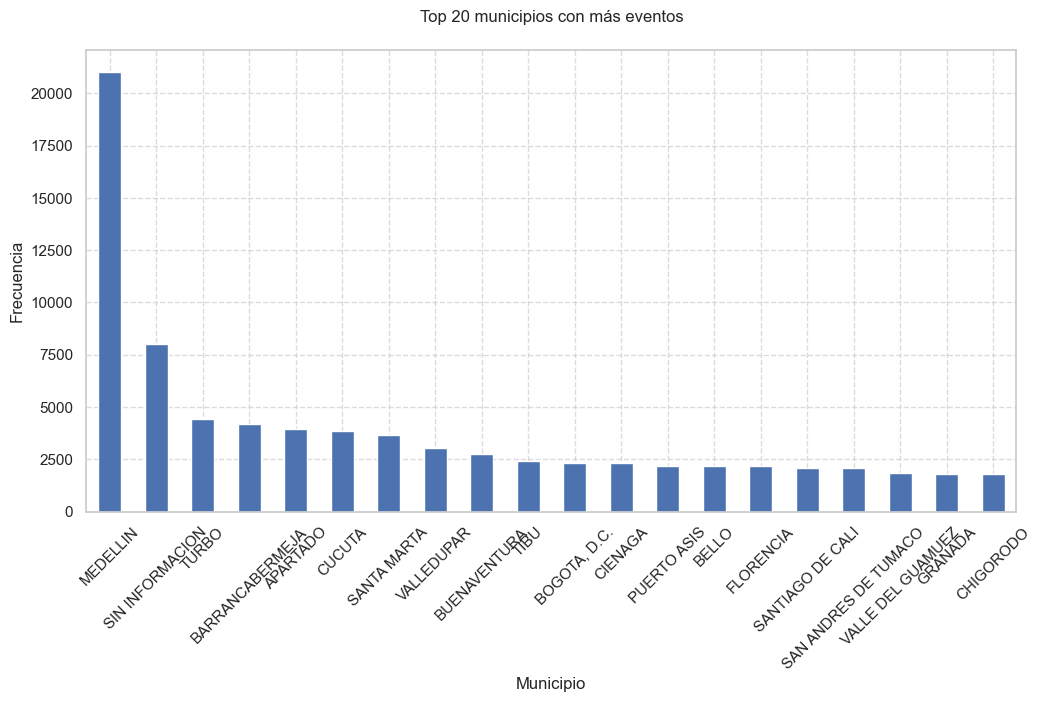


Resumen estadístico de coordenadas:
             Latitud       Longitud
count  264536.000000  264536.000000
mean        6.050894     -74.885760
std         2.708303       1.545443
min        -4.199511     -81.717624
25%         4.005034     -75.916961
50%         6.257590     -75.223509
75%         7.866433     -73.782116
max        13.351110     -67.068827


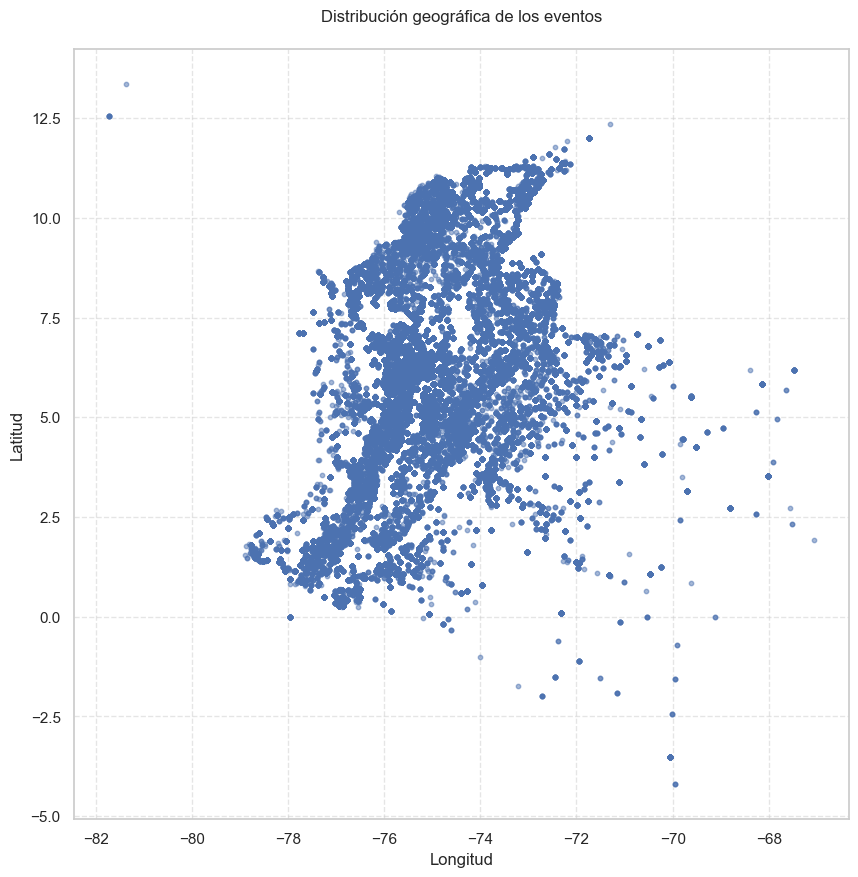

In [124]:
print(df_eda["Municipio"].nunique())
print("\nTop 20 municipios con más eventos:")
municipio_counts = df_eda['Municipio'].value_counts()
print(municipio_counts.head(20))

plt.figure(figsize=(12,6))
municipio_counts.head(20).plot(kind='bar')
plt.title('Top 20 municipios con más eventos')
plt.xlabel('Municipio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



##. Análisis geográfico (coordenadas)
print("\nResumen estadístico de coordenadas:")
print(df_eda[['Latitud', 'Longitud']].describe())

# Visualización de eventos en mapa
plt.figure(figsize=(10,10))
plt.scatter(df_eda['Longitud'], df_eda['Latitud'], alpha=0.5, s=10)
plt.title('Distribución geográfica de los eventos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




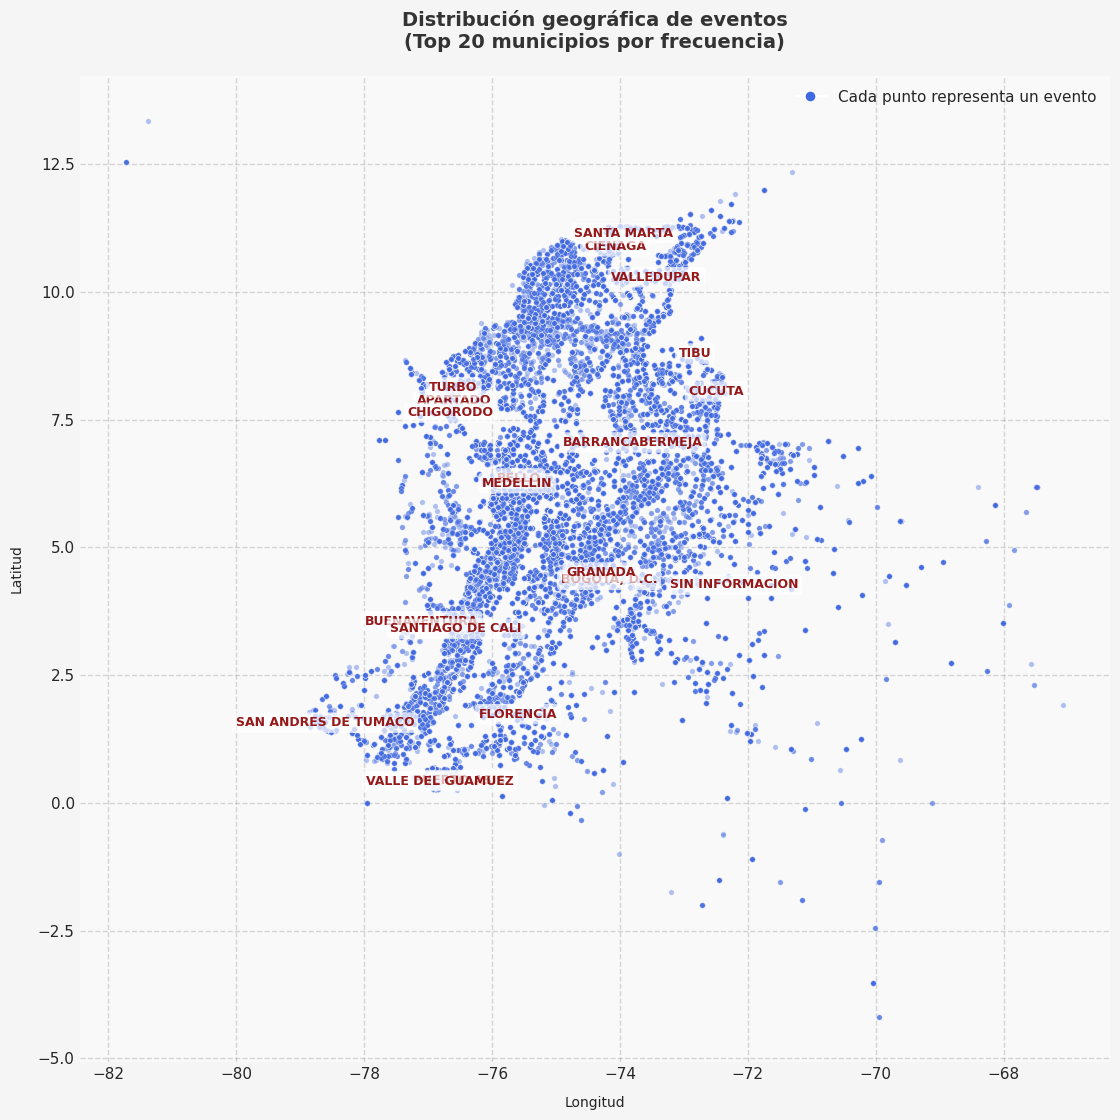

In [125]:
import matplotlib.pyplot as plt

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo con cuadrícula sutil
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fuente más legible

# Paso 1: Top 20 municipios por número de eventos
top_munis = df_eda['Municipio'].value_counts().nlargest(20).index

# Paso 2: Coordenadas promedio de cada municipio
coords_muni = df_eda[df_eda['Municipio'].isin(top_munis)].groupby('Municipio')[['Latitud', 'Longitud']].mean()

# Crear figura con tamaño personalizado
fig, ax = plt.subplots(figsize=(12, 12), facecolor='#f5f5f5')

# Scatterplot general con mejor estética
scatter = ax.scatter(df_eda['Longitud'], df_eda['Latitud'], 
                    alpha=0.4, s=15, color='royalblue',
                    edgecolor='white', linewidth=0.3)

# Añadir etiquetas para los 20 municipios con mejor formato
for municipio, row in coords_muni.iterrows():
    ax.text(row['Longitud'], row['Latitud'], municipio, 
           fontsize=9, weight='bold', alpha=0.9,
           color='darkred', ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.7, 
                    edgecolor='none', boxstyle='round,pad=0.3'))

# Título y etiquetas con formato mejorado
ax.set_title('Distribución geográfica de eventos\n(Top 20 municipios por frecuencia)',
            fontsize=14, pad=20, weight='bold', color='#333333')
ax.set_xlabel('Longitud', fontsize=10, labelpad=10)
ax.set_ylabel('Latitud', fontsize=10, labelpad=10)

# Cuadrícula más sutil
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Ajustar márgenes y aspecto
ax.set_axisbelow(True)  # Grid behind points
fig.tight_layout(pad=3)

# Añadir color de fondo al área del gráfico
ax.set_facecolor('#f9f9f9')

# Opcional: Añadir una leyenda explicativa si es relevante
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                         label='Cada punto representa un evento',
                         markerfacecolor='royalblue', markersize=8)]
ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)

plt.show()



Gráfico de dispersión que representa la ubicación geográfica de los eventos violentos registrados en Colombia, donde cada punto azul simboliza un evento. Se resaltan los 20 municipios con mayor frecuencia mediante etiquetas rojas. La mayor concentración de eventos se localiza en el noroccidente del país y en zonas tradicionalmente afectadas por el conflicto armado.

### Tipo de delitos 

In [126]:
print("\nDistribución de tipos de caso:")
caso_counts = df_eda['caso'].value_counts()
print(caso_counts)


Distribución de tipos de caso:
caso
Asesinatos selectivos    157136
Desaparición forzada      68796
Reclutamiento             17280
Violencia sexual          16573
Masacres                   4751
Name: count, dtype: int64


### Total de victimas

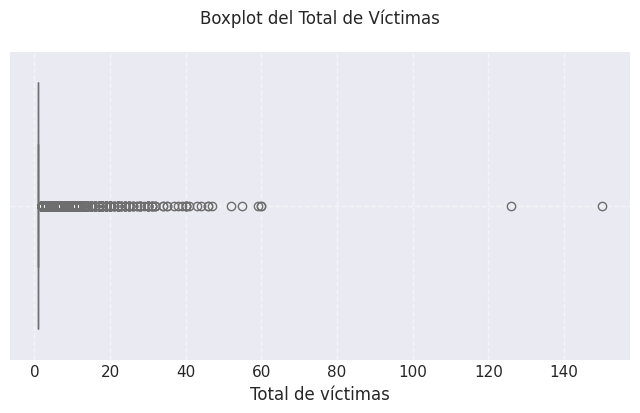

In [127]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_eda["Total_de_victimas"], color='lightcoral')
plt.title('Boxplot del Total de Víctimas')
plt.xlabel('Total de víctimas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\1595510011.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_eda, x='Ano', y='Total_de_victimas', estimator='sum', ci=None, marker='o')


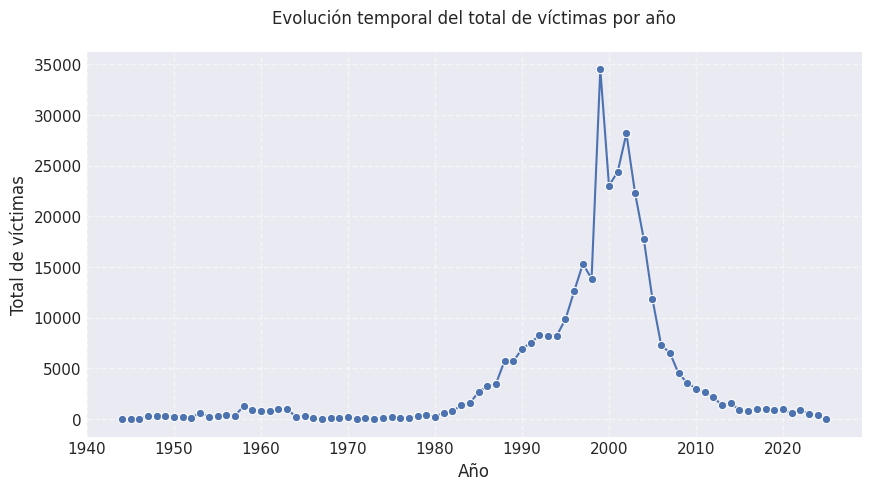

In [128]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_eda, x='Ano', y='Total_de_victimas', estimator='sum', ci=None, marker='o')
plt.title('Evolución temporal del total de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Total de víctimas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



Evolución temporal del total de víctimas por año.
La gráfica de línea muestra la evolución anual del total de víctimas reportadas desde 1940 hasta 2023. Se observa un aumento gradual desde la década de 1980, con un crecimiento acelerado durante los años 90, alcanzando un pico dramático alrededor del año 2000, con más de 34.000 víctimas en ese año. Posteriormente, se registra un descenso pronunciado en la cantidad de víctimas hasta estabilizarse en niveles más bajos a partir de 2010. Este comportamiento refleja los momentos más intensos del conflicto armado en Colombia y los posibles impactos de procesos de paz y políticas de seguridad.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\1318320244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prom_victimas_muni.values, y=prom_victimas_muni.index, palette='viridis')


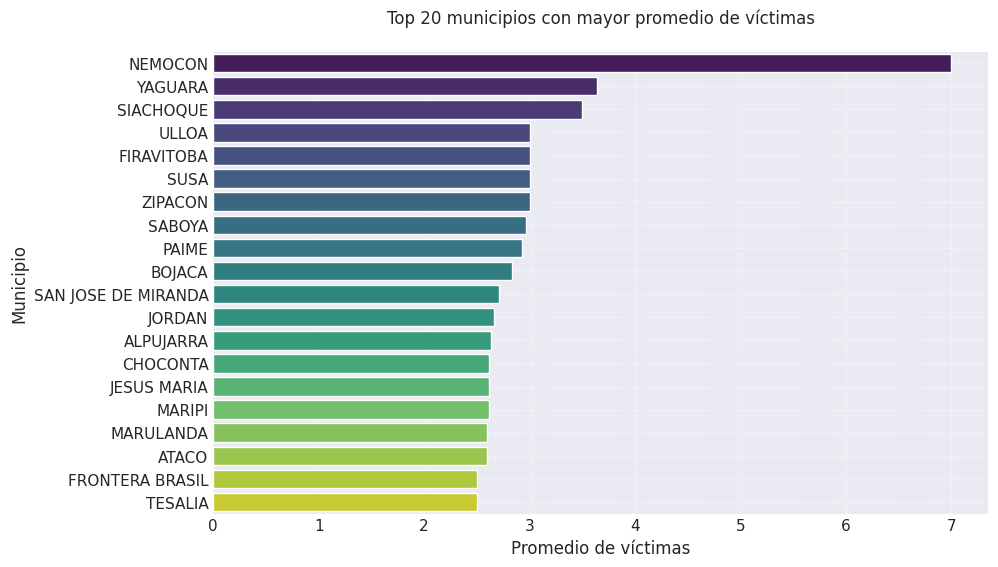

In [129]:
prom_victimas_muni = df_eda.groupby('Municipio')['Total_de_victimas'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=prom_victimas_muni.values, y=prom_victimas_muni.index, palette='viridis')
plt.title('Top 20 municipios con mayor promedio de víctimas')
plt.xlabel('Promedio de víctimas')
plt.ylabel('Municipio')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\1850457275.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


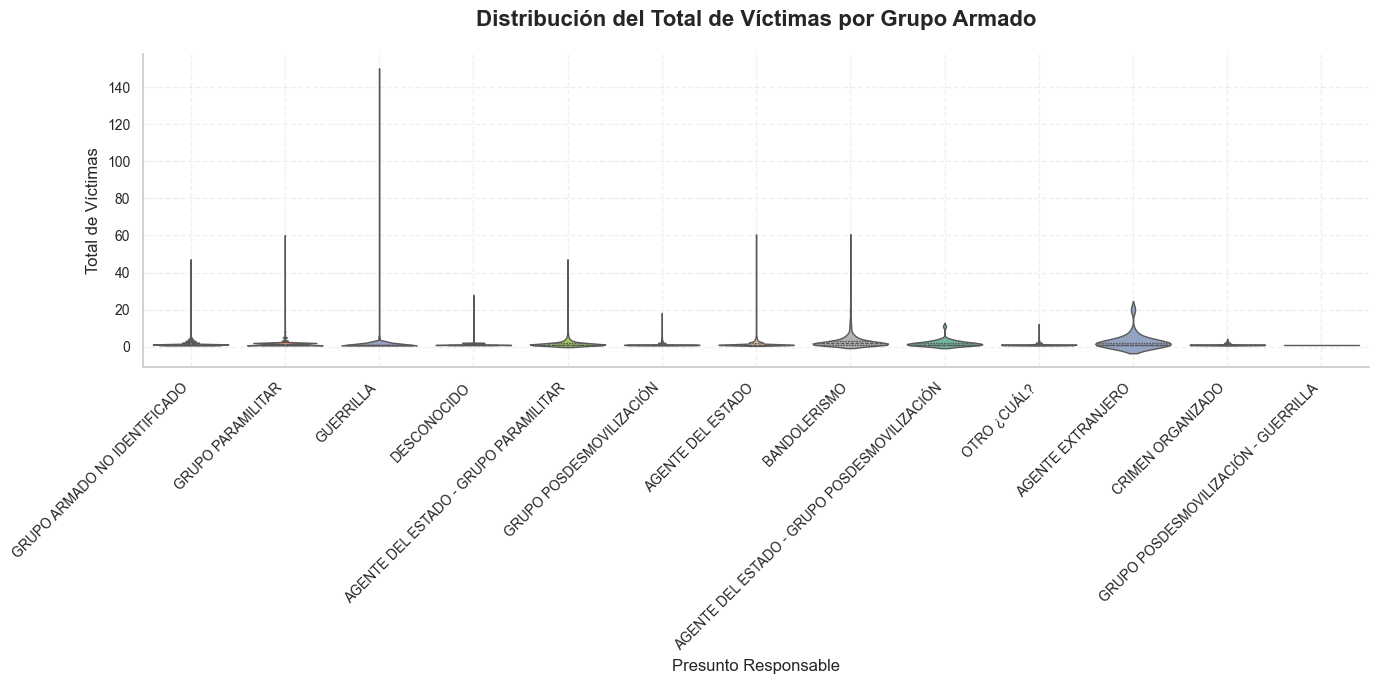

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set(style='whitegrid')

# Tamaño y figura
plt.figure(figsize=(14, 7))

# Violinplot con mejoras visuales
sns.violinplot(
    data=df_eda,
    x='Presunto_Responsable',
    y='Total_de_victimas',
    inner='quartile',
    palette='Set2',
    linewidth=1
)

# Título y etiquetas
plt.title('Distribución del Total de Víctimas por Grupo Armado', fontsize=16, weight='bold')
plt.xlabel('Presunto Responsable', fontsize=12)
plt.ylabel('Total de Víctimas', fontsize=12)

# Rotación y alineación de etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Cuadrícula
plt.grid(True, linestyle='--', alpha=0.3)

# Eliminar borde superior y derecho
sns.despine()

# Ajustar layout
plt.tight_layout()
plt.show()


Esta gráfica tipo "violin plot" muestra la distribución del número total de víctimas atribuidas a cada presunto grupo armado responsable. Se observa que los grupos Guerrilla, Grupo Paramilitar y Grupo Armado No Identificado presentan una mayor dispersión y valores atípicos en el número de víctimas, lo que indica episodios con un número elevado de víctimas. La categoría "Agente Extranjero" también presenta una distribución notablemente amplia en comparación con otras categorías menos representadas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\3398533219.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


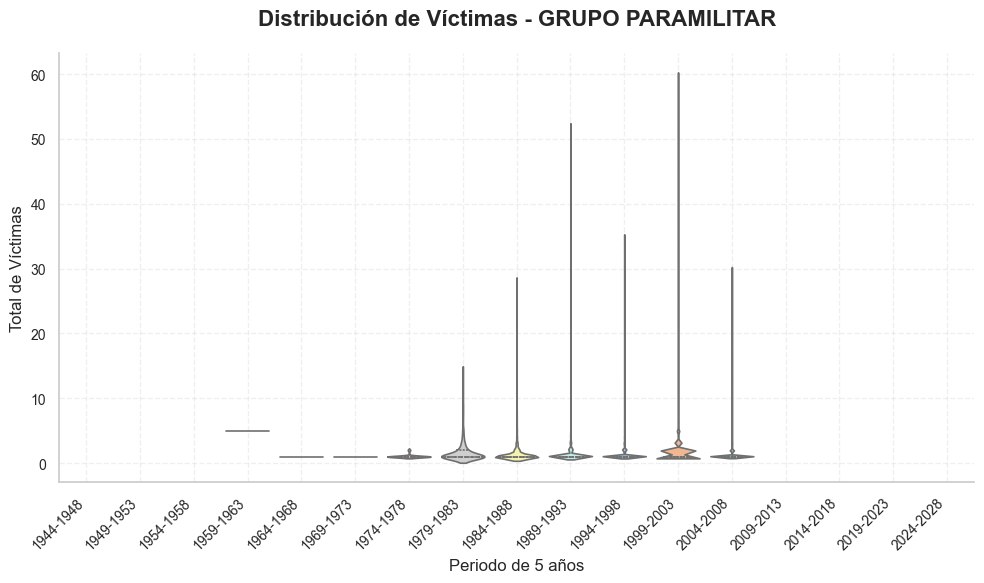

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\3398533219.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


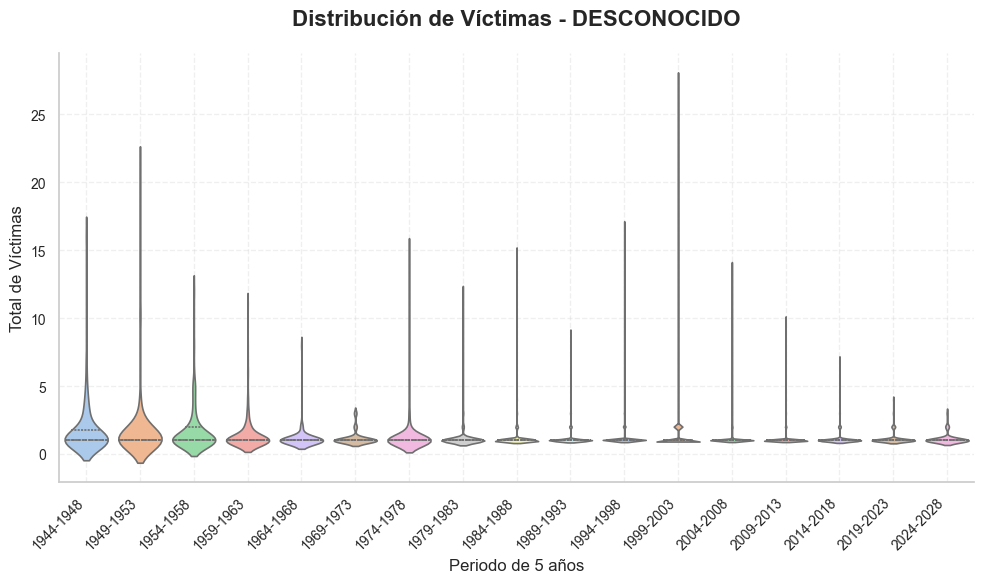

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\3398533219.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


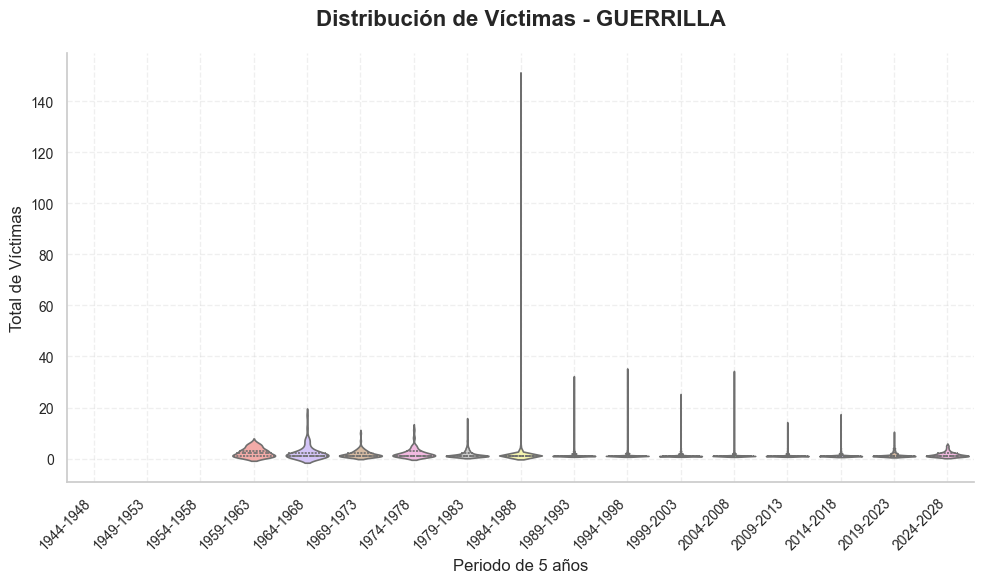

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\3398533219.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


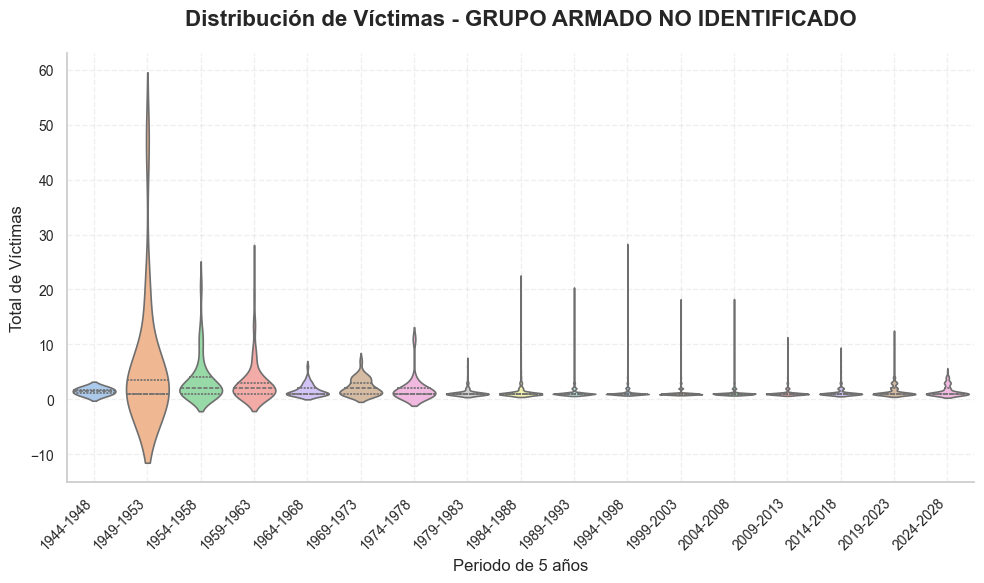

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13676\3398533219.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


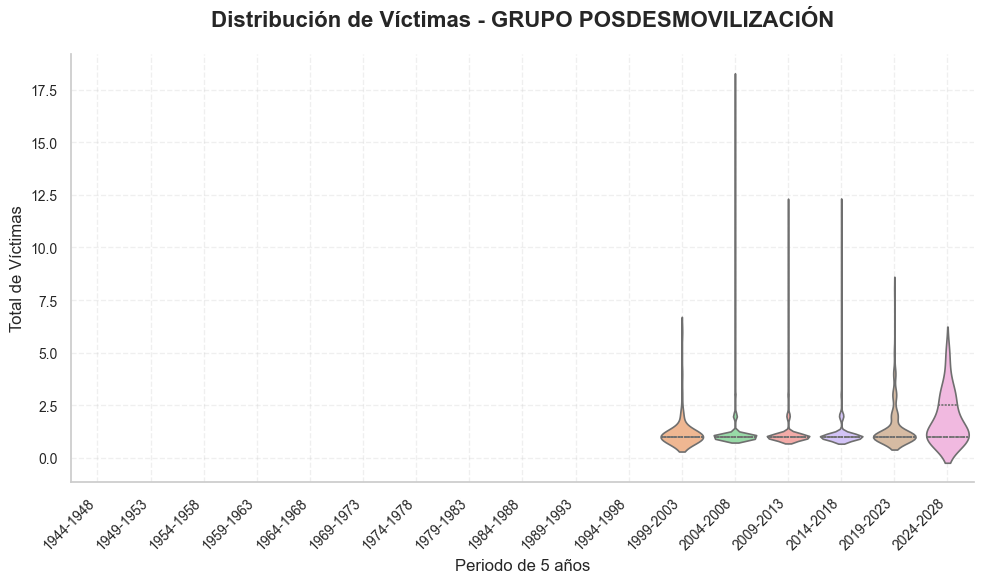

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Estilo visual
sns.set(style='whitegrid')

# Copiar el DataFrame
df_plot = df_eda.copy()

# Crear columna con intervalos de 5 años
df_plot['Periodo_5años'] = pd.cut(
    df_plot['Ano'],
    bins=range(df_plot['Ano'].min(), df_plot['Ano'].max() + 5, 5),
    right=False,
    labels=[f"{i}-{i+4}" for i in range(df_plot['Ano'].min(), df_plot['Ano'].max(), 5)]
)

# Seleccionar los 5 grupos armados con más eventos
top_grupos = df_plot['Presunto_Responsable'].value_counts().nlargest(5).index

# Crear y mostrar una gráfica por cada grupo
for grupo in top_grupos:
    df_grupo = df_plot[df_plot['Presunto_Responsable'] == grupo]

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df_grupo,
        x='Periodo_5años',
        y='Total_de_victimas',
        palette='pastel',
        inner='quartile',
        linewidth=1.2
    )

    plt.title(f'Distribución de Víctimas - {grupo}', fontsize=16, weight='bold')
    plt.xlabel('Periodo de 5 años', fontsize=12)
    plt.ylabel('Total de Víctimas', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    sns.despine()
    plt.tight_layout()
    plt.show()


Figura 1
Distribución de víctimas del Grupo Paramilitar por periodos de 5 años.
Este gráfico violin representa la evolución temporal del total de víctimas atribuidas al Grupo Paramilitar, agrupadas en periodos quinquenales. La intensidad del conflicto asociado a este grupo se incrementa notablemente entre los periodos 1994–1998, 1999–2003 y 2004–2008, con mayor dispersión y presencia de eventos con múltiples víctimas.

Figura 2
Distribución de víctimas por perpetrador desconocido por periodos de 5 años.
Este gráfico muestra cómo el número de víctimas atribuidas a perpetradores desconocidos ha fluctuado a lo largo del tiempo. Se evidencian picos entre 1944 y 1968, y un resurgimiento entre 1984 y 2003, indicando que en esos periodos hubo una alta proporción de casos en los que no fue posible identificar al grupo armado responsable.

Figura 3
Distribución de víctimas por parte de la Guerrilla por periodos de 5 años.
Este gráfico violin ilustra el comportamiento de las víctimas atribuibles a la Guerrilla en bloques de cinco años. Se observa un pico sobresaliente en el periodo 1984–1988, lo que indica un evento o conjunto de eventos con un número excepcionalmente alto de víctimas. La violencia atribuida a la Guerrilla también se mantiene activa hasta 2018, aunque con menor intensidad.

Figura 4
Distribución de víctimas por parte de Grupo Armado No Identificado por periodos de 5 años.
Aquí se representa la evolución del número de víctimas causadas por grupos armados no identificados. Se destacan las décadas de los 40s a 60s con mayores niveles de dispersión y número de víctimas, seguido de una disminución progresiva en los periodos posteriores. Esta categoría refleja la dificultad de atribución durante ciertos periodos del conflicto.

Figura 5
Distribución de víctimas por parte de Grupos Posdesmovilización por periodos de 5 años.
Esta figura muestra la aparición y actividad de los Grupos Posdesmovilización, con registros a partir del periodo 2004–2008. La mayor variabilidad en el número de víctimas se presenta entre 2009 y 2018, reflejando la continuidad de la violencia tras los procesos de desmovilización paramilitar.

### Correlacion entre variables

###

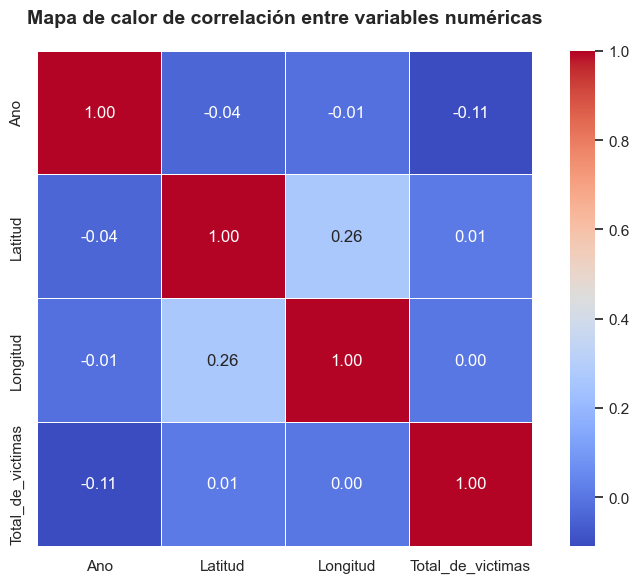

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas
variables_numericas = ['Ano', 'Latitud', 'Longitud', 'Total_de_victimas']

# Calcular matriz de correlación
correlacion = df_eda[variables_numericas].corr()

# Plot del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Mapa de calor de correlación entre variables numéricas', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


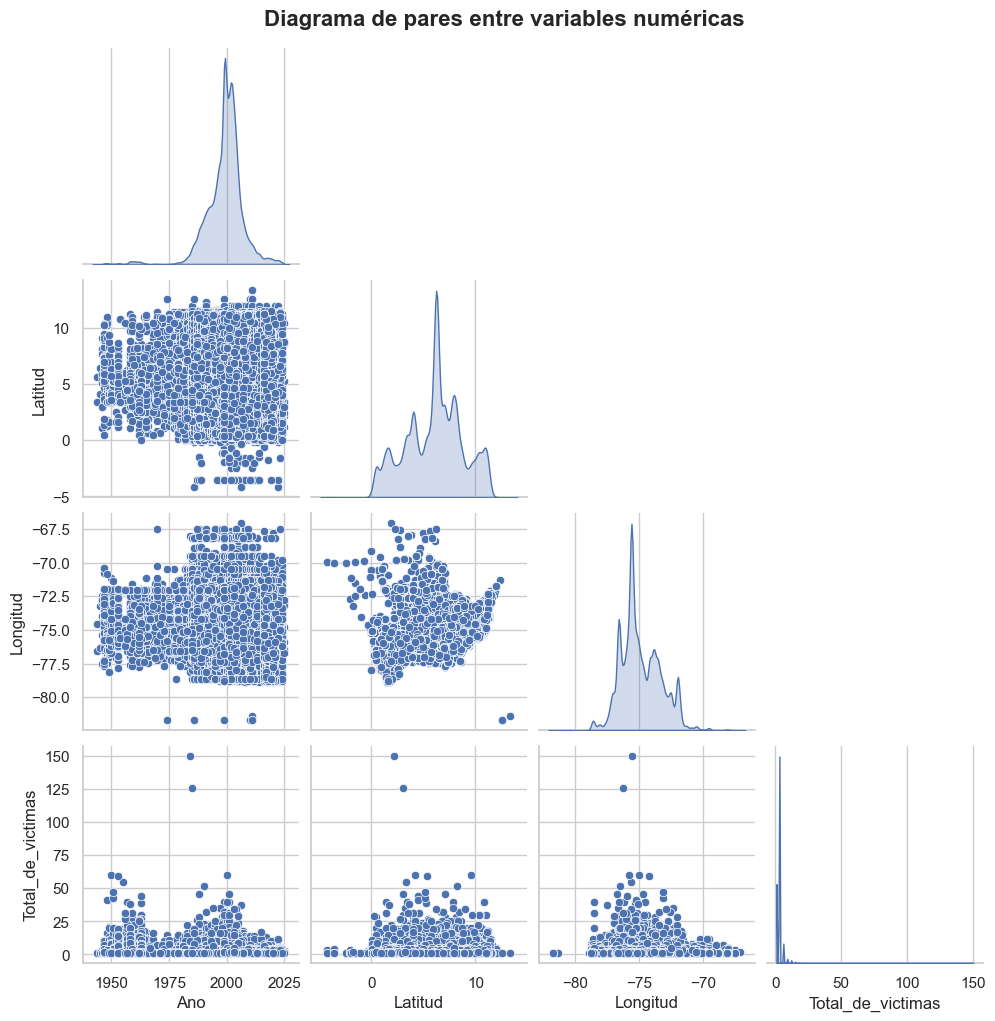

In [133]:
# Pairplot
sns.pairplot(df_eda[variables_numericas], diag_kind='kde', corner=True)
plt.suptitle('Diagrama de pares entre variables numéricas', fontsize=16, weight='bold', y=1.02)
plt.show()
